# Training TinyVGG on Flowers17 With Regularization To Improve Accuracy 

#### Import Necessary Packages

In [2]:
from imutils import paths
from drig.preprocessors.preprocessors import ImageToArrayPreprocessor, UniformAspectPreprocessor
from drig.datasets.datasetloader import DatasetLoader
from sklearn.preprocessing import LabelBinarizer
from sklearn.model_selection import train_test_split
from drig.networks.networks import TinyVGG
from keras.optimizers import SGD
from sklearn.metrics import classification_report
from drig.utils import plot_training_metrics
from keras.preprocessing.image import ImageDataGenerator
import numpy as np

#### Load Images

In [3]:
image_paths=list(paths.list_images("../datasets/17flowers/"))
classes=[image_path.split("/")[-2] for image_path in image_paths]
classes=[str(label) for label in np.unique(classes)]

#### Load Preprocessors

In [4]:
uniform_aspect=UniformAspectPreprocessor(64, 64)
image_to_array=ImageToArrayPreprocessor()

#### Load Data

In [5]:
data_loader=DatasetLoader(preprocessors=[uniform_aspect, image_to_array])
data, labels= data_loader.load(image_paths, verbose=1)

Processed 1360/1360 Images.


#### Normalize Data

In [6]:
data=data.astype("float")/255.0

#### Split Data To Training & Testing Dataset

In [7]:
train_x, test_x, train_y, test_y= train_test_split(data, labels, test_size=0.25, random_state=42)

#### One-Hot Enccoded Labels

In [8]:
label_binarizer=LabelBinarizer()
train_y=label_binarizer.fit_transform(train_y)
test_y=label_binarizer.transform(test_y)

#### Initialise Image Data Generator Object

In [9]:
augmenter=ImageDataGenerator(rotation_range=30, width_shift_range=0.2, height_shift_range=0.2, 
                             shear_range=0.2, zoom_range=0.2, horizontal_flip=True, fill_mode='nearest')

#### Build & Compile TinyVGG Model

In [10]:
opt=SGD(learning_rate=0.05)
model=TinyVGG.build(width=64, height=64, depth=3, classes=len(classes))
model.compile(loss="categorical_crossentropy", optimizer=opt, metrics=["accuracy"])

#### Traing Model With Augmented Data

In [11]:
epochs=100
Z=model.fit(augmenter.flow(train_x, train_y, batch_size=32), validation_data=(test_x, test_y),
                     steps_per_epoch=len(train_x)//32, epochs=epochs, verbose=1)

Epoch 1/100
31/31 [==============================] - 3s 83ms/step - loss: 3.7434 - accuracy: 0.1502 - val_loss: 2.9638 - val_accuracy: 0.0500
Epoch 2/100
31/31 [==============================] - 2s 70ms/step - loss: 2.5715 - accuracy: 0.3092 - val_loss: 3.1991 - val_accuracy: 0.0824
Epoch 3/100
31/31 [==============================] - 2s 70ms/step - loss: 2.1779 - accuracy: 0.3683 - val_loss: 3.4910 - val_accuracy: 0.0912
Epoch 4/100
31/31 [==============================] - 2s 70ms/step - loss: 1.8995 - accuracy: 0.4275 - val_loss: 4.6024 - val_accuracy: 0.0559
Epoch 5/100
31/31 [==============================] - 2s 70ms/step - loss: 1.9694 - accuracy: 0.3920 - val_loss: 4.3055 - val_accuracy: 0.0912
Epoch 6/100
31/31 [==============================] - 2s 70ms/step - loss: 1.7647 - accuracy: 0.4516 - val_loss: 3.9338 - val_accuracy: 0.1147
Epoch 7/100
31/31 [==============================] - 2s 70ms/step - loss: 1.6828 - accuracy: 0.4639 - val_loss: 3.9181 - val_accuracy: 0.1265
Epoch 

#### Running Predictions

In [12]:
predictions=model.predict(test_x, batch_size=32)


#### Get Model Prediction Report

In [13]:
print(classification_report(test_y.argmax(axis=1),predictions.argmax(axis=1), target_names=classes))

              precision    recall  f1-score   support

           0       0.38      0.33      0.36        15
           1       0.45      0.50      0.48        20
          10       0.95      0.74      0.83        27
          11       0.43      0.75      0.55        20
          12       0.68      0.94      0.79        16
          13       0.63      0.67      0.65        18
          14       1.00      0.22      0.36        23
          15       0.74      0.70      0.72        20
          16       1.00      0.58      0.73        19
           2       1.00      0.50      0.67        18
           3       0.79      0.68      0.73        22
           4       0.36      1.00      0.53        20
           5       0.75      0.65      0.70        23
           6       0.83      0.90      0.86        21
           7       0.69      0.48      0.56        23
           8       0.80      0.75      0.77        16
           9       1.00      0.84      0.91        19

    accuracy              

#### Plot Model Training Metrics

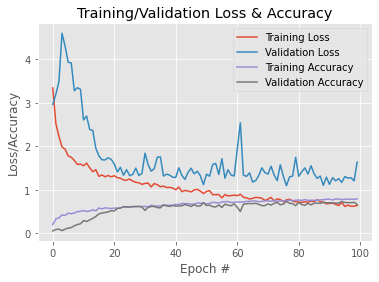

In [14]:
plot_training_metrics(epochs, Z)